In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/application_data.csv', index_col='SK_ID_CURR', parse_dates=True)

In [3]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [4]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [5]:
#1) Find all categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category'])
print(categorical_vars)

           NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
100002             Cash loans           M            N               Y   
100003             Cash loans           F            N               N   
100004        Revolving loans           M            Y               Y   
100006             Cash loans           F            N               Y   
100007             Cash loans           M            N               Y   
...                       ...         ...          ...             ...   
456251             Cash loans           M            N               N   
456252             Cash loans           F            N               Y   
456253             Cash loans           F            N               Y   
456254             Cash loans           F            N               Y   
456255             Cash loans           F            N               N   

           NAME_TYPE_SUITE      NAME_

In [6]:
# 2) Find Count of instances in 0 and 1 class
count_of_target_class = df['TARGET'].value_counts()
print(count_of_target_class)

0    282686
1     24825
Name: TARGET, dtype: int64


In [7]:
df.shape

(307511, 121)

In [8]:
# Find % of instances in 0 and 1 class
percentage_of_target_class=(df['TARGET'].value_counts()/df.shape[0])*100
percentage_of_target_class

print(percentage_of_target_class)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'Count of Observations in Target Class')

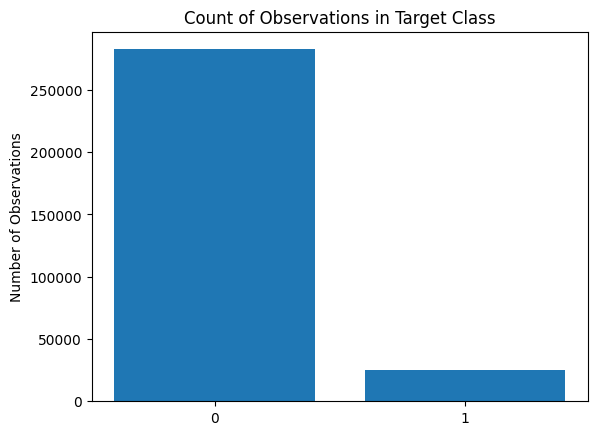

In [9]:
##4) Bar chart for both 2nd and 3rd
plt.bar([0,1],count_of_target_class.values)
plt.xticks([0,1])
plt.ylabel("Number of Observations")
plt.title("Count of Observations in Target Class")


Text(0.5, 1.0, 'Percentage of Observations in Target Class')

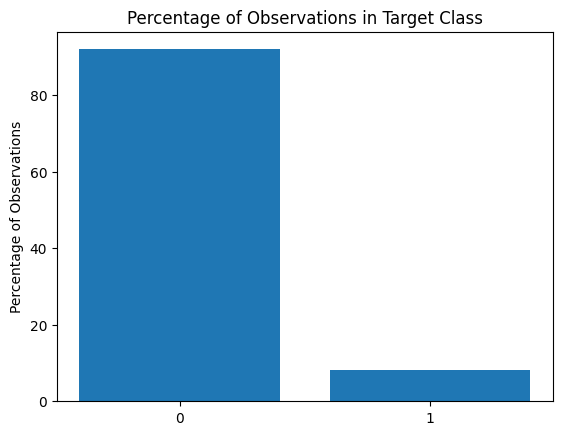

In [10]:
plt.bar([0,1],percentage_of_target_class.values)
plt.xticks([0,1])
plt.ylabel("Percentage of Observations")
plt.title("Percentage of Observations in Target Class")

In [11]:
## 5) Find unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(unique_values)

[1 0]
['Cash loans' 'Revolving loans']
['M' 'F' 'XNA']
['N' 'Y']
['Y' 'N']
[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
[ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
[24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
[ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
[0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.03

In [12]:
# How many unique values in each column
column_names=list(df.columns)
for k in column_names:
  print(k, df[k].unique().shape[0])

TARGET 2
NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 15
AMT_INCOME_TOTAL 2548
AMT_CREDIT 5603
AMT_ANNUITY 13673
AMT_GOODS_PRICE 1003
NAME_TYPE_SUITE 8
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
REGION_POPULATION_RELATIVE 81
DAYS_BIRTH 17460
DAYS_EMPLOYED 12574
DAYS_REGISTRATION 15688
DAYS_ID_PUBLISH 6168
OWN_CAR_AGE 63
FLAG_MOBIL 2
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 19
CNT_FAM_MEMBERS 18
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
WEEKDAY_APPR_PROCESS_START 7
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
ORGANIZATION_TYPE 58
EXT_SOURCE_1 114585
EXT_SOURCE_2 119832
EXT_SOURCE_3 815
APARTMENTS_AVG 2340
BASEMENTAREA_AVG 3781
YEARS_BEGINEXPLUATATION_AVG 286
YEARS_BUILD_AVG 150
COMMONAREA_AVG 3182
ELEVATO

In [13]:
##6) Find how many nan values in each column
df.isna().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 121, dtype: int64

In [14]:
# 7)Preprocessing for each column differently according to the nan values in each column
df_with_0=df.fillna(0)
df_with_0

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [15]:
# Question 6
df_missing_value_percentage = 100*df.isnull().sum()/len(df)
for k in range(df_missing_value_percentage.shape[0]):
  print(column_names[k],df_missing_value_percentage.iloc[k])

TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.0039022994299390914
AMT_GOODS_PRICE 0.09040327012692229
NAME_TYPE_SUITE 0.42014757195677555
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
OWN_CAR_AGE 65.9908100848425
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_PHONE 0.0
FLAG_EMAIL 0.0
OCCUPATION_TYPE 31.345545362604916
CNT_FAM_MEMBERS 0.000650383238323182
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
LIVE_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
LIVE_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.0
EXT_SOURCE_1 56.38107254699832
EXT_SOU

In [16]:
# Remove columns with more than 50% NaN values
threshold = 0.5

# Calculate the percentage of NaN values in each column
nan_percentages = df.isna().mean()
print(nan_percentages)

# Get the column names that have NaN percentages above the threshold
columns_to_drop = nan_percentages[nan_percentages > threshold].index

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Print the resulting DataFrame
print(df)

TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 121, dtype: float64
            TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   
...            ...                ...         ...          ...   
456251         

In [39]:
# Calculate the percentage of NaN values in each column
nan_percentages = df.isna().mean() * 100

# Identify columns with more than 50% NaN values
columns_with_high_nan = nan_percentages[nan_percentages > 50].index

# Drop columns with more than 50% NaN values
#df_dropped = df.drop(columns=columns_with_high_nan)
df = df.drop(columns=columns_with_high_nan)

# Calculate the NaN percentages for the remaining columns
#nan_percentages_remaining = df_dropped.isna().mean() * 100
nan_percentages_remaining = df.isna().mean() * 100

# Output the remaining columns with their NaN percentages
print("Remaining columns with NaN percentages:")
for column, percentage in nan_percentages_remaining.items():
    print(f"{column}: {percentage}%")





Remaining columns with NaN percentages:
TARGET: 0.0%
NAME_CONTRACT_TYPE: 0.0%
CODE_GENDER: 0.0%
FLAG_OWN_CAR: 0.0%
FLAG_OWN_REALTY: 0.0%
CNT_CHILDREN: 0.0%
AMT_INCOME_TOTAL: 0.0%
AMT_CREDIT: 0.0%
AMT_ANNUITY: 0.003902299429939092%
AMT_GOODS_PRICE: 0.09040327012692229%
NAME_TYPE_SUITE: 0.42014757195677555%
NAME_INCOME_TYPE: 0.0%
NAME_EDUCATION_TYPE: 0.0%
NAME_FAMILY_STATUS: 0.0%
NAME_HOUSING_TYPE: 0.0%
REGION_POPULATION_RELATIVE: 0.0%
DAYS_BIRTH: 0.0%
DAYS_EMPLOYED: 0.0%
DAYS_REGISTRATION: 0.0%
DAYS_ID_PUBLISH: 0.0%
FLAG_MOBIL: 0.0%
FLAG_EMP_PHONE: 0.0%
FLAG_WORK_PHONE: 0.0%
FLAG_CONT_MOBILE: 0.0%
FLAG_PHONE: 0.0%
FLAG_EMAIL: 0.0%
OCCUPATION_TYPE: 31.345545362604916%
CNT_FAM_MEMBERS: 0.0006503832383231819%
REGION_RATING_CLIENT: 0.0%
REGION_RATING_CLIENT_W_CITY: 0.0%
WEEKDAY_APPR_PROCESS_START: 0.0%
HOUR_APPR_PROCESS_START: 0.0%
REG_REGION_NOT_LIVE_REGION: 0.0%
REG_REGION_NOT_WORK_REGION: 0.0%
LIVE_REGION_NOT_WORK_REGION: 0.0%
REG_CITY_NOT_LIVE_CITY: 0.0%
REG_CITY_NOT_WORK_CITY: 0.0%
LIV

In [40]:
#8) As all remaining columns with missing value above 40% are normalized we need to remove them as their is no way to substitute values in them
# Drop the column above 40% NaN values
df = df.drop(['YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE'],axis=1)


In [41]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


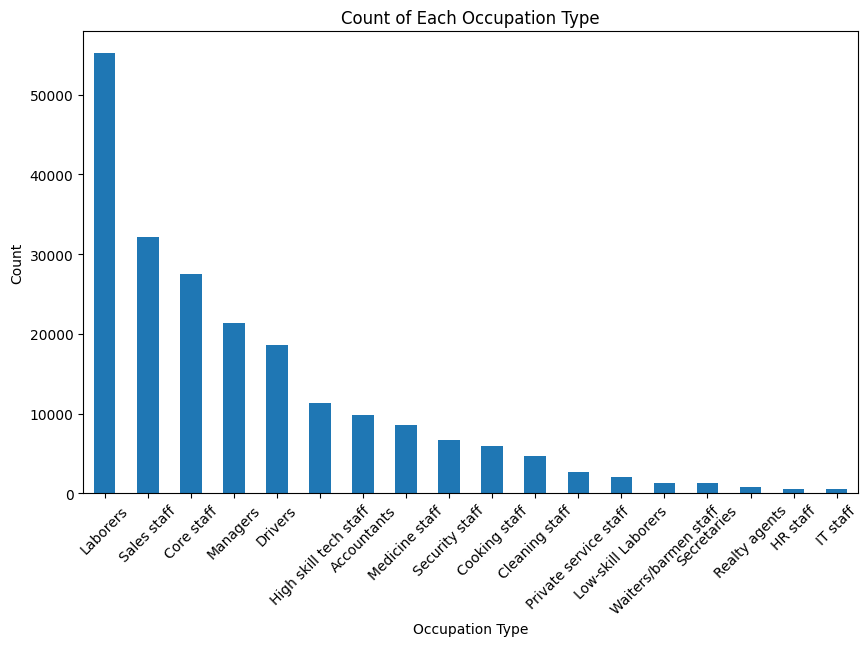

In [42]:
# 9) Analysis of OCCUPATION_TYPE do a plot showing count of each category
import pandas as pd
import matplotlib.pyplot as plt

 # HOW TO HANDLE OCCUPATION_TYPE

# Count the occurrences of each category in the 'OCCUPATION_TYPE' column
occupation_counts = df['OCCUPATION_TYPE'].value_counts()


# Create a bar plot of the occupation counts
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar')
plt.title('Count of Each Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [43]:
df['OCCUPATION_TYPE'].isna().sum()

96391

<Axes: >

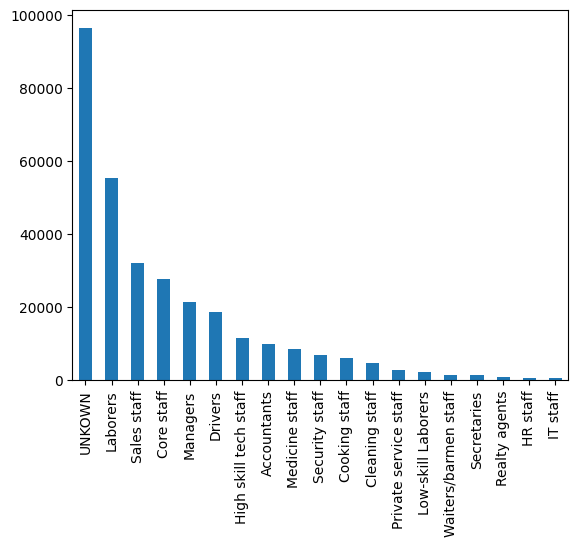

In [44]:
## HOW TO HANDLE OCCUPATION_TYPE

# 1st way to drop occupation type column itself
# 2nd drop rows which are nan in occupation type column
# 3rd Introduce a new a category called unkown and create dummies

df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('UNKOWN')
df['OCCUPATION_TYPE'].value_counts().plot.bar()

In [45]:
# 10) which category comes the most in OCCUPATION_TYPE  column
most_common_category = occupation_counts.idxmax()

print("The most common category in OCCUPATION_TYPE is:", most_common_category)

The most common category in OCCUPATION_TYPE is: Laborers


In [46]:
## 11) How many TARGET COLUMNS are 1 and 0 for most reoccurring category in OCCUPATION_TYPE   column
most_recurring_category = df['OCCUPATION_TYPE'].value_counts().idxmax()
filtered_df = df[df['OCCUPATION_TYPE'] == most_recurring_category]
target_counts = filtered_df['TARGET'].value_counts()
count_1 = target_counts[1]
count_0 = target_counts[0]
print(target_counts)

0    90113
1     6278
Name: TARGET, dtype: int64


In [47]:
# 12) How many TARGET COLUMNS are 1 and have OCCUPATION_TYPE  column  as laboure
#Filter the DataFrame to include only rows where the "OCCUPATION_TYPE" column is "labourer" and the "TARGET" column is 1
filtered_df = df[(df['OCCUPATION_TYPE'] == 'labourer') & (df['TARGET'] == 1)]
# Count the number of rows in the filtered DataFrame
count = len(filtered_df)
print(count)

0


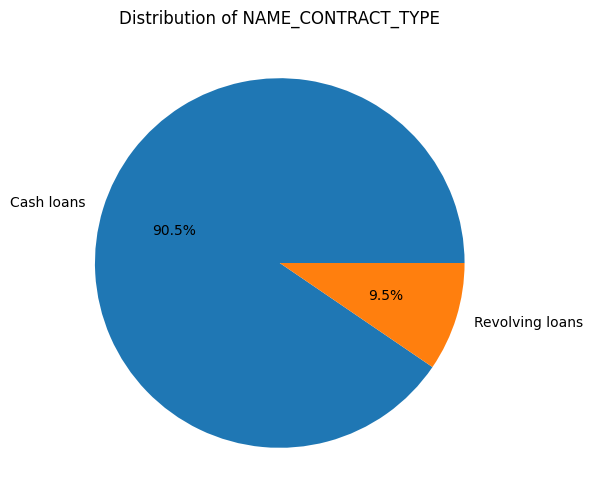

In [48]:
# 13) pie chart for counts of NAME_CONTRACT_TYPE and NAME_INCOME_TYPE
contract_counts = df['NAME_CONTRACT_TYPE'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%')
plt.title('Distribution of NAME_CONTRACT_TYPE')
plt.show()

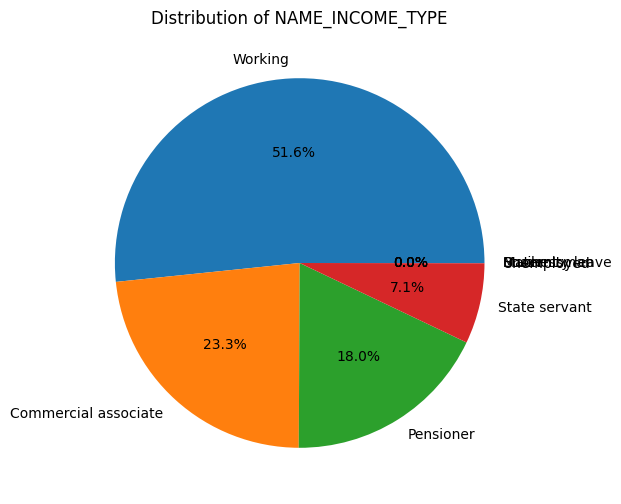

In [49]:
## pie chart for counts ofNAME_INCOME_TYPE
income_counts = df['NAME_INCOME_TYPE'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Distribution of NAME_INCOME_TYPE')
plt.show()

In [54]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
cat_cols = [col for col in df.columns if df[col].dtype=='object' ]
num_cols = [col for col in df.columns if col not in cat_cols and col!= 'TARGET']
print(cat_cols)
print()
print(num_cols)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_D

In [57]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [58]:
# set up preprocessing for numeric columns
imp_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
# set up preprocessing for categorical columns
imp_constant = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore')

In [59]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0


In [65]:
# Drop the 'occupation_type' column
df=df.drop('OCCUPATION_TYPE', axis=1)

In [66]:
# Apply label encoding across multiple columns
label_encoder = LabelEncoder()
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [70]:
# Drop rows with NaN values
df.dropna(axis=0, inplace=True)

# Drop columns with NaN values
df.dropna(axis=1, inplace=True)

In [71]:
X = df.drop(['TARGET'], axis =1)
y = df[['TARGET']]

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=50)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay


rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
Y_pred_rf = rf.predict(X_test)
accuracy=accuracy_score(y_test,Y_pred_rf)
cm = confusion_matrix(y_test, Y_pred)
print('accuracy_random_Forest : %.3f' %accuracy)
print('Confusion matrix for Random Forest\n',cm)

<ipython-input-76-27cd9352d594>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


accuracy_random_Forest : 0.931
Confusion matrix for Random Forest
 [[34647    69]
 [ 2555    13]]


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

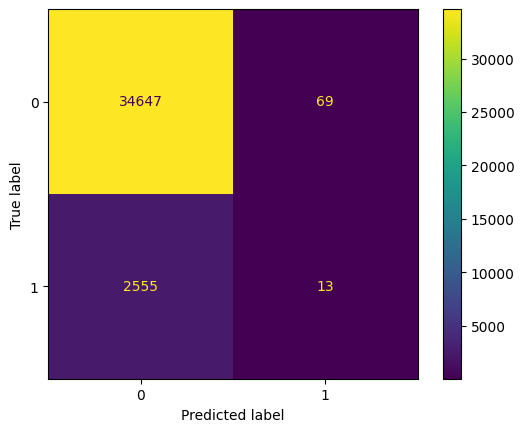

In [78]:
cm = confusion_matrix(y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,Y_pred)
cm = confusion_matrix(y_test, Y_pred)
print('accuracy_KNN : %.3f' %accuracy)
print('Confusion matrix for KNN\n',cm)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_KNN : 0.931
Confusion matrix for KNN
 [[34647    69]
 [ 2555    13]]


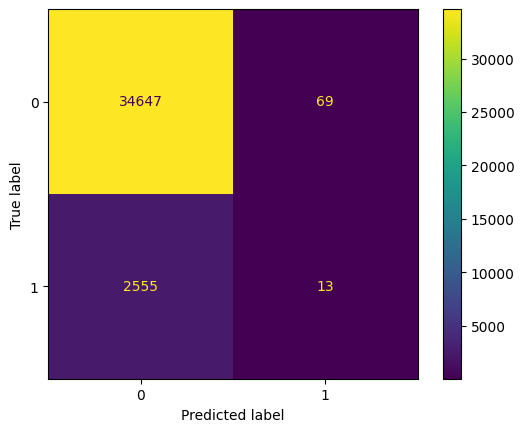

In [81]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.931


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1) Find all categorical variables

2) Find Count of instances in 0 and 1 class

3) Find % of instances in 0 and 1 class

4) Bar chart for both 2nd and 3rd

5) Find unique values in each column

6) Find how many nan values in each column

7) Preprocessing for each column differently according to the nan values in each column

In [ ]:


8) As all remaining columns with missing value above 40% are normalized we need to remove them as their is no way to substitute values in them
9) Analysis of OCCUPATION_TYPE do a plot showing count of each category

10) which category comes the most in OCCUPATION_TYPE  column

11) How many TARGET COLUMNS are 1 and 0 for most reoccurring category in OCCUPATION_TYPE   column
12) How many TARGET COLUMNS are 1 and have OCCUPATION_TYPE  column  as laboure

13) pie chart for counts of NAME_CONTRACT_TYPE and NAME_INCOME_TYPE
14) Sample Homework

a) Remove  occupation type column and fill remaining nan values with mode or median and apply

Random Forest, ANN,KNN,SVM and logistic regression and compare results using a bar chart for each model
15)[Monday 11:13 PM] Rohit Sharma

Handling occupation  type before applying model these three methods need to be done



# 1st way to drop occupation type column itself

# 2nd drop rows which are nan in occupation type column

# 3rd Introduce a new a category called unkown and create dummies